<a href="https://colab.research.google.com/github/prat-man/CSE-575-Statistical-Machine-Learning/blob/main/source/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten

from urllib.request import urlretrieve
from zipfile import ZipFile
from PIL import Image

In [2]:
import httpimport

with httpimport.remote_repo('https://raw.githubusercontent.com/prat-man/CSE-575-Statistical-Machine-Learning/main/source/utils'):
    from data import get_data

In [3]:
seed = 0

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test, labels = get_data('CNN')

In [5]:
model_layers = [
    Input(X_train.shape[1:4]),
    
    Conv2D(64, (3, 3)),
    MaxPool2D(pool_size=(2, 2,)),

    Conv2D(32, (3, 3)),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(16, (3, 3)),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),

    Dense(64),

    Dense(10, activation='softmax')
]

model = Sequential(model_layers)

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 286, 430, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 143, 215, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 141, 213, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 106, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 68, 104, 16)       4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 34, 52, 16)       0

In [8]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
19/19 [==============================] - 11s 264ms/step - loss: 2353.7537 - accuracy: 0.1133 - val_loss: 1085.3970 - val_accuracy: 0.1050
Epoch 2/20
19/19 [==============================] - 2s 120ms/step - loss: 646.0295 - accuracy: 0.2117 - val_loss: 496.3180 - val_accuracy: 0.1550
Epoch 3/20
19/19 [==============================] - 2s 119ms/step - loss: 258.2846 - accuracy: 0.3250 - val_loss: 227.0650 - val_accuracy: 0.3150
Epoch 4/20
19/19 [==============================] - 2s 122ms/step - loss: 144.8692 - accuracy: 0.4067 - val_loss: 159.6051 - val_accuracy: 0.2850
Epoch 5/20
19/19 [==============================] - 2s 122ms/step - loss: 64.2224 - accuracy: 0.5300 - val_loss: 62.3527 - val_accuracy: 0.4300
Epoch 6/20
19/19 [==============================] - 2s 123ms/step - loss: 20.1516 - accuracy: 0.7483 - val_loss: 40.3770 - val_accuracy: 0.4900
Epoch 7/20
19/19 [==============================] - 2s 121ms/step - loss: 13.8475 - accuracy: 0.7750 - val_loss: 47.0217 - va

In [9]:
_, accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {accuracy}')

19/19 [==============================] - 1s 44ms/step - loss: 1.1238e-06 - accuracy: 1.0000
Training Accuracy: 1.0


In [10]:
y_pred = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 41ms/step


In [11]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        20
           1       0.82      0.90      0.86        20
           2       0.38      0.55      0.45        20
           3       0.42      0.75      0.54        20
           4       0.52      0.55      0.54        20
           5       0.84      0.80      0.82        20
           6       0.90      0.90      0.90        20
           7       0.62      0.50      0.56        20
           8       0.59      0.50      0.54        20
           9       0.38      0.15      0.21        20

    accuracy                           0.60       200
   macro avg       0.61      0.60      0.59       200
weighted avg       0.61      0.60      0.59       200



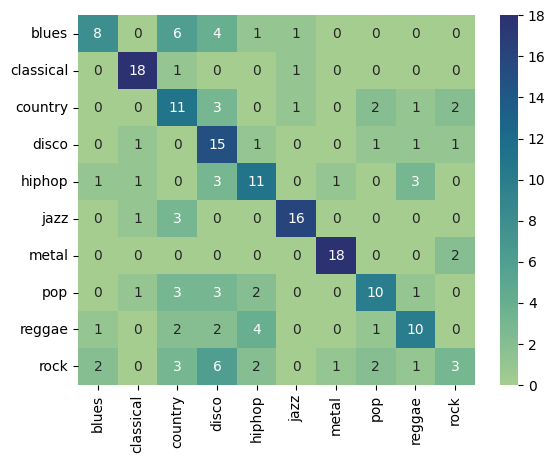

In [12]:
conf_m = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_m, cmap='crest', annot=True)

plt.xticks(ticks = np.arange(0.5, 10, 1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0.5, 10, 1), labels=labels,rotation=0)

plt.savefig('CNN_Confusion_Matrix.png', dpi=300)

In [13]:
accuracy = np.trace(conf_m) / np.sum(conf_m)
print(f'Overall test accuracy = {accuracy}')

Overall test accuracy = 0.6


In [14]:
accuracy_df = pd.DataFrame(columns=['accuracy'])

class_acc = conf_m.diagonal() / conf_m.sum(axis=1)
for i in range(len(labels)):
    accuracy_df.loc[labels[i]] = [round(class_acc[i], 2)]

accuracy_df

,accuracy
blues,0.40
classical,0.90
country,0.55
disco,0.75
hiphop,0.55
jazz,0.80
metal,0.90
pop,0.50
reggae,0.50
rock,0.15


In [15]:
model.save('CNN.h5')